# Initial Mining

In [1]:
import os
import sys
import pandas as pd
import matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%pylab inline
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.grid.which'] = 'both'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['axes.titlesize'] = 24

Populating the interactive namespace from numpy and matplotlib


In [3]:
import mining
import dtw
import general
import ajax
import views
import mva
import labeling

## Production version mining

In [4]:
general.data_path="data/"
df = mining.preprocess_data(save_csv=True)
df

Ajax Mining for : data/day_2015-10-01 - 2015-10-02/ajax_events.csv
Ajax Mining for : data/day_2015-10-02 - 2015-10-03/ajax_events.csv
Ajax Mining for : data/day_2015-10-03 - 2015-10-04/ajax_events.csv
Ajax Mining for : data/day_2015-10-04 - 2015-10-05/ajax_events.csv
Ajax Mining for : data/day_2015-10-05 - 2015-10-06/ajax_events.csv
Ajax Mining for : data/day_2015-10-06 - 2015-10-07/ajax_events.csv
Ajax Mining for : data/day_2015-10-07 - 2015-10-08/ajax_events.csv
Ajax Mining for : data/day_2015-10-08 - 2015-10-09/ajax_events.csv
Ajax Mining for : data/day_2015-10-09 - 2015-10-10/ajax_events.csv
Ajax Mining for : data/day_2015-10-10 - 2015-10-11/ajax_events.csv
Ajax Mining for : data/day_2015-10-11 - 2015-10-12/ajax_events.csv
Ajax Mining for : data/day_2015-10-12 - 2015-10-13/ajax_events.csv
Ajax Mining for : data/day_2015-10-13 - 2015-10-14/ajax_events.csv
Ajax Mining for : data/day_2015-10-14 - 2015-10-15/ajax_events.csv
Ajax Mining for : data/day_2015-10-15 - 2015-10-16/ajax_events

,Success,Fail,Views,FailAvgDuration,SuccessAvgDuration,TotalAvgDuration,Start_Time,End_Time,AvgSessionDuration,Sessions,RatioFS,RatioFV
5.0.302.270 (production#bc7f456.160202-1806),9083,1440,8634,9.327145e+03,4454.767090,4589.545898,2016-02-03,2016-03-01,1743.256836,1182,0.158538,0.166782
5.0.302.268 (production#375c47e.160202-0901),60228,9508,46670,6.833280e+04,9400.818359,10410.153320,2016-02-03,2016-02-18,2457.789551,5723,0.157867,0.203728
5.0.302.267 (production#ff0a7a7.160129-1259),205878,29624,142152,5.259831e+04,9314.627930,11902.630859,2016-01-30,2016-02-22,2270.455322,19242,0.143891,0.208397
5.0.302.252 (production#2dba53c.160115-0103),15107,1056,9440,9.264602e+02,30.381615,97.595993,2016-01-15,2016-01-27,2474.983398,1137,0.069901,0.111864
5.0.302.266 (production#0ab057d.160128-1800),17240,321,8195,9.289358e+03,526.865295,570.566284,2016-01-29,2016-02-07,2321.615479,1272,0.018619,0.039170
5.0.302.284 (production#384b804.160222-1016),575,9,825,3.633333e+02,30.277779,30.277779,2016-02-22,2016-02-25,1637.725952,84,0.015652,0.010909
5.0.302.273 (production#e4eae2d.160204-1555),1829,26,5178,3.259750e+04,2760.700439,2760.700439,2016-02-05,2016-02-12,515.105042,300,0.014215,0.005021
5.0.302.126 (production#a136d92.151006-1045),102508,1250,47802,9.610308e+04,68390.804688,68037.960938,2015-10-05,2015-10-13,1827.934937,4157,0.012194,0.026150
5.0.302.127 (production#e39601a.151007-1353),103114,1099,58404,1.754811e+04,9918.322266,9817.259766,2015-10-07,2015-10-14,1710.568970,4246,0.010658,0.018817
5.0.302.121 (production#a34f776.150929-1031),112364,964,47129,1.923143e+04,91.348640,191.832047,2015-10-01,2015-10-09,2336.363037,3998,0.008579,0.020454


## Calculate DTW variables for training

In [5]:
dtw.DTW_AJAXV()

DTW Calculation for 5.0.302.270 (production#bc7f456.160202-1806)
DTW Calculation for 5.0.302.268 (production#375c47e.160202-0901)
DTW Calculation for 5.0.302.267 (production#ff0a7a7.160129-1259)
DTW Calculation for 5.0.302.252 (production#2dba53c.160115-0103)
DTW Calculation for 5.0.302.266 (production#0ab057d.160128-1800)
DTW Calculation for 5.0.302.284 (production#384b804.160222-1016)
DTW Calculation for 5.0.302.273 (production#e4eae2d.160204-1555)
DTW Calculation for 5.0.302.126 (production#a136d92.151006-1045)
DTW Calculation for 5.0.302.127 (production#e39601a.151007-1353)
DTW Calculation for 5.0.302.121 (production#a34f776.150929-1031)
DTW Calculation for 5.0.302.261 (production#c8da84b.160126-0937)
DTW Calculation for 5.0.302.276 (production#003ab99.160209-1542)
DTW Calculation for 5.0.302.262 (production#cb4d344.160126-1510)
DTW Calculation for 5.0.302.263 (production#395a8f5.160127-1312)
DTW Calculation for 5.0.302.283 (production#6147f30.160218-1327)
DTW Calculation for 5.0.3

,Success,Fail,Views,FailAvgDuration,SuccessAvgDuration,TotalAvgDuration,Start_Time,End_Time,AvgSessionDuration,Sessions,RatioFS,RatioFV,DTW_FV,DTW_SV,DTW_FS
5.0.302.270 (production#bc7f456.160202-1806),9083,1440,8634,9.327145e+03,4454.767090,4589.545898,2016-02-03,2016-03-01,1743.256836,1182,0.158538,0.166782,0.817619,0.369281,1.092078
5.0.302.268 (production#375c47e.160202-0901),60228,9508,46670,6.833280e+04,9400.818359,10410.153320,2016-02-03,2016-02-18,2457.789551,5723,0.157867,0.203728,0.255132,0.079537,0.201702
5.0.302.267 (production#ff0a7a7.160129-1259),205878,29624,142152,5.259831e+04,9314.627930,11902.630859,2016-01-30,2016-02-22,2270.455322,19242,0.143891,0.208397,0.201899,0.087801,0.172049
5.0.302.252 (production#2dba53c.160115-0103),15107,1056,9440,9.264602e+02,30.381615,97.595993,2016-01-15,2016-01-27,2474.983398,1137,0.069901,0.111864,0.505223,0.104613,0.389547
5.0.302.266 (production#0ab057d.160128-1800),17240,321,8195,9.289358e+03,526.865295,570.566284,2016-01-29,2016-02-07,2321.615479,1272,0.018619,0.039170,0.918717,0.227552,0.856302
5.0.302.284 (production#384b804.160222-1016),575,9,825,3.633333e+02,30.277779,30.277779,2016-02-22,2016-02-25,1637.725952,84,0.015652,0.010909,4.504332,0.195967,4.517349
5.0.302.273 (production#e4eae2d.160204-1555),1829,26,5178,3.259750e+04,2760.700439,2760.700439,2016-02-05,2016-02-12,515.105042,300,0.014215,0.005021,0.897319,0.699229,0.766978
5.0.302.126 (production#a136d92.151006-1045),102508,1250,47802,9.610308e+04,68390.804688,68037.960938,2015-10-05,2015-10-13,1827.934937,4157,0.012194,0.026150,0.193524,0.107237,0.208109
5.0.302.127 (production#e39601a.151007-1353),103114,1099,58404,1.754811e+04,9918.322266,9817.259766,2015-10-07,2015-10-14,1710.568970,4246,0.010658,0.018817,0.177809,0.122264,0.191951
5.0.302.121 (production#a34f776.150929-1031),112364,964,47129,1.923143e+04,91.348640,191.832047,2015-10-01,2015-10-09,2336.363037,3998,0.008579,0.020454,0.670140,0.062694,0.693963


## Cluster the samples for initial labeling

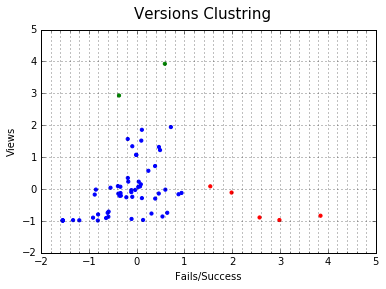

In [6]:
labeling.cluster_versions()

## Train BDT 

Training Set Confusion matrix
[[ 100.    0.]
 [   0.  100.]]
Testing Set Confusion matrix
[[ 100.            0.        ]
 [   3.84615385   80.        ]]
Accuracy: Training= 100.0 , Testing= 96.7741935484


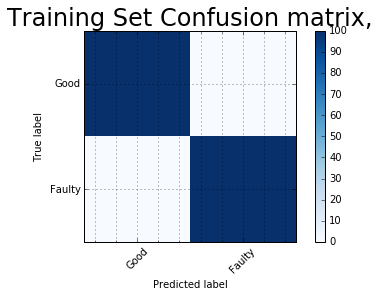

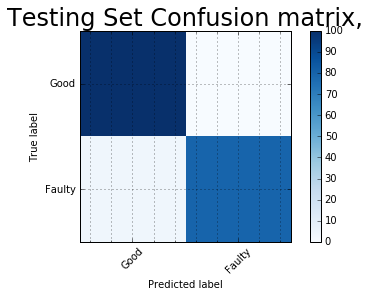

In [7]:
mva.train()

## One Tree Structure of the BDT

<img src='bdt.png'>